# 5. 토큰화 Tokenizing

## 5-a. 토큰화 계획
- word extraction 한 단어 리스트로 사용자 정의 사전을 만든다
- mecab 이용하여 tokenizing 한다

## 5-b. 토큰화 프로세스
1. mecab 을 컴파일하고, 테스트한다
  - 테스트할 text 를 제작한다
  - 토큰화 테스트
2. word extraction의 결과 단어 리스트를 불러온다
3. 사용자 정의 사전을 제작하고, .csv 파일로 저장해둔다
  - 종성이 있는지 판단한다
4. 여기까지 함수화한다 (단어 리스트 불러오기 + 사용자 정의 사전 파일로 저장)
5. 사용자 정의 사전을 `C:\mecab\user-dic` 에 옮긴다
6. 사용자 정의 사전을 컴파일한다
7. 토큰화 한다
  - [1-a] 의 text로 테스트를 진행한다
  - 변화가 있는지 체크한다

## 5-c. 사용자 정의사전 만들기

### 5-c-1. mecab 컴파일
- Mecab 메뉴얼 : https://kain7f1.notion.site/Mecab-195acbade3f14463b137c4490baebc76?pvs=4

### 5-c-2. (pycharm으로 실행) macab 토큰화 테스트

In [4]:
# 메뉴얼에 따라 빌드하고, pycharm에서 테스트합니다
import MeCab

txt1 = "주식으로 선거때마다 한탕 해처먹는 간잽이진짜 확망했으면"
m = MeCab.Tagger()
tokens = m.parse(txt1)
print(tokens)

ModuleNotFoundError: No module named 'MeCab'

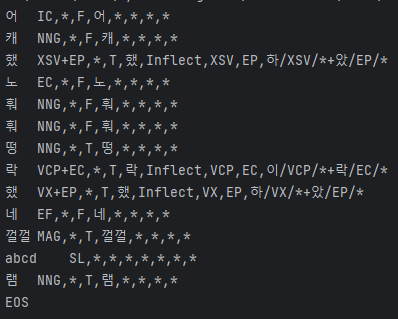

### 5-c-3. word extraction의 결과 단어 리스트를 불러오기

In [10]:
# 텍스트 파일을 열고 읽기
file_path = "4_word_list.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# 줄바꿈 문자 제거
word_list = [line.strip() for line in lines]

# 결과 출력
print(word_list)

['몰라', '아님', '최대', '넘어', '드라', 'ㅈㄴ', '건설', '유럽', '콘솔', 'vs', '영상', '최근', '어케', '속슬', '밴드', '쉬움', '천억', '행동', '줏어', 'ㄱㄱ', '휴젤', '겨우', '감소', '물량', '채널', '통수', '첨단', '쇼크', '요즘', '지수', '막상', '인수', '운용', '레알', '기업', '세금', '고점', '절대', '갤주', '출시', '잠시', '명품', 'ㅆㅂ', '욕심', '뻘짓', '패턴', '주식', 'QQ', '섹터', '금리', '병신', 'ar', '거기', '묵히', '액분', 'it', '웹툰', '찬티', '표정', '승인', '건강', '피해', 'YG', '베팅', '끌어', '횡보', '학생', '업계', '저런', '언제', '운영', '언급', 'SM', 'ts', '실적', '회복', '기술', '퍄퍄', '권리', '스트', '직업', '미래', '이제', '각각', '친구', '빙신', '꾸준', '굿굿', '두번', 'FT', '착한', '교육', '조정', '엔터', '몇개', '치킨', '당시', 'NC', 'AI', '탄생', 'ㅈㄹ', '각종', '날아', '텔콘', '압박', '임상', '손절', '뒤진', '미장', '급락', '유저', '증시', '세계', 'ㅇㅇ', '서울', '컄ㅋ', '쪼개', '엑바', '껄껄', '쌍봉', '시총', 'da', '드립', 'ㅇㅈ', '휘청', '획득', '본전', '물린', '흉기', '<<', '코인', '머리', '호구', '초기', '빌딩', '목표', '매출', '악질', '졸업', '팀장', '괜히', '앨범', '셀트', '취급', '랠리', '땅값', '임마', '분할', '과연', '관리', '가능', '온갖', '축소', '줍줍', '떵락', '링크', '념글', '걔넨', '설비', '강한', '흑우', '행사', '격차', '길드', 'cc', '금방', 'ㅁㅊ

In [11]:
len(word_list)

2752

### 5-c-4. 사용자 정의 사전 만들기

In [12]:
import numpy as np
import pandas as pd

# 단어의 마지막 글자에 종성이 있는지 체크하는 함수
def has_jongseong(char):
    if '가' <= char <= '힣':
        unicode_value = ord(char)
        jongseong = (unicode_value - 0xAC00) % 28
        return jongseong != 0
    else:
        return False

data = []  # 사전에 들어갈 형태로 가공해서 넣을거임
for word in word_list:
    if len(word) == 0:
        continue
    if has_jongseong(word[-1]):  # 마지막 글자에 종성이 있으면 'T' 없으면 'F'
        jongseong = 'T'
    else:
        jongseong = 'F'
    # 사전 파일인 nnp.csv에 맞는 형식으로 데이터를 세팅함
    new_row = [word, np.nan, np.nan, 0, 'NNP', '*', jongseong, word, '*', '*', '*', '*']
    data.append(new_row)

df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,몰라,NaN,NaN,0,NNP,*,F,몰라,*,*,*,*
1,아님,NaN,NaN,0,NNP,*,T,아님,*,*,*,*
2,최대,NaN,NaN,0,NNP,*,F,최대,*,*,*,*
3,넘어,NaN,NaN,0,NNP,*,F,넘어,*,*,*,*
4,드라,NaN,NaN,0,NNP,*,F,드라,*,*,*,*


In [13]:
fpath_to_save = '5_nnp.csv'
df.to_csv(fpath_to_save, index=False, encoding="utf-8", header=False)
print(f'{fpath_to_save} 파일이 생성되었습니다')

5_nnp.csv 파일이 생성되었습니다


### 5-c-5. 사용자 정의 사전 제작 함수화

In [8]:
import numpy as np
import pandas as pd

def make_user_dict(fpath_word_list, fpath_user_dict):
    # 1. word_list 파일 읽어오기
    print("[progress 1/3] word_list 파일 읽어오기")
    with open(fpath_word_list, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    word_list = [line.strip() for line in lines]  # 줄바꿈 문자 제거

    # 단어의 마지막 글자에 종성이 있는지 체크하는 함수
    def has_jongseong(char):
        if '가' <= char <= '힣':
            unicode_value = ord(char)
            jongseong = (unicode_value - 0xAC00) % 28
            return jongseong != 0
        else:
            return False

    # 2. mecab 사전의 형식으로 데이터 가공하기
    print("[progress 2/3] mecab 사전의 형식으로 데이터 가공하기")
    data = []  # 사전에 들어갈 형태로 가공해서 넣을거임
    for word in word_list:
        if len(word) == 0:
            continue
        if has_jongseong(word[-1]):  # 마지막 글자에 종성이 있으면 'T' 없으면 'F'
            jongseong = 'T'
        else:
            jongseong = 'F'
        # 사전 파일인 nnp.csv에 맞는 형식으로 데이터를 세팅함
        new_row = [word, np.nan, np.nan, 0, 'NNP', '*', jongseong, word, '*', '*', '*', '*']
        data.append(new_row)
    
    df = pd.DataFrame(data)

    # 3. 가공한 데이터를 파일로 저장하기
    print("[progress 3/3] 가공한 데이터를 파일로 저장하기")
    df.to_csv(fpath_user_dict, index=False, encoding="utf-8", header=False)
    print(f"{fpath_user_dict} 파일이 생성되었습니다")

    print("[done]")

### 5-c-6. 함수 테스트

In [9]:
fpath_word_list = "4_word_list.txt"
fpath_user_dict = "5_nnp.csv"

make_user_dict(fpath_word_list, fpath_user_dict)

[progress 1/3] word_list 파일 읽어오기
[progress 2/3] mecab 사전의 형식으로 데이터 가공하기
[progress 3/3] 가공한 데이터를 파일로 저장하기
5_nnp.csv 파일이 생성되었습니다
[done]


## 5-d. 사용자 정의 사전 컴파일
- 사용자 정의 사전을 옮긴다
- Windows ProwerShell ISE 를 켠다
- cd C:\mecab
- .\tools\add-userdic-win.ps1

## 5-e. 토큰화 Tokenizing

### 5-e-1. test_tokenizing.py : 토큰화 결과인 tokens 칼럼을 생성하여 파일로 저장한다

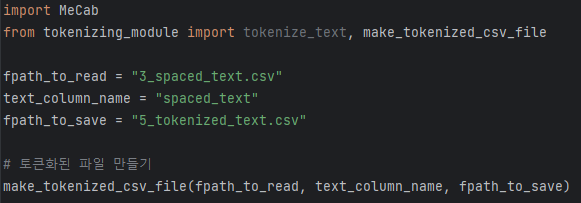

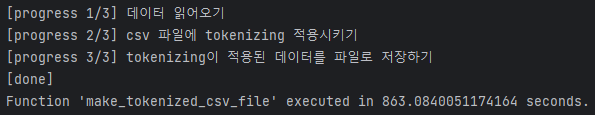

### 5-e-2. 결과 확인

In [17]:
import pandas as pd
df = pd.read_csv("5_tokenized_text.csv", encoding="utf-8")
df.tail(3)

,search_keyword,date_created,time_created,writer,is_reply,id,spaced_text,tokens
891011,휴젤,2020-04-29,11:55:10,ㅇㅇ(123.215),0,241400125127,미국주식보다 한국꺼보면 ㄹㅇ 암걸릴 것 같음 특히 휴젤 저거 아는분이 임원진인데 회...,"['미국', '주식', '보다', '한국', '꺼', '보', '면', 'ㄹㅇ', ..."
891012,휴젤,2020-04-29,11:56:16,ㅇㄷ(175.223),1,241400125127,한국 상장회사들중에 ㅂㅅ같은곳이 넘 많음...,"['한국', '상장', '회사', '들', '중', '에', 'ㅂㅅ', '같', '..."
891013,휴젤,2020-04-29,11:56:38,ㅇㅇ(223.33),1,241400125127,신흥국 회사투자 망설여지는 게 이거 때문임. 주식시장에 대한 개념이 안 잡혀있음.,"['신흥국', '회사', '투자', '망설여', '지', '는', '게', '이거'..."


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891014 entries, 0 to 891013
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   search_keyword  891014 non-null  object
 1   date_created    891014 non-null  object
 2   time_created    891014 non-null  object
 3   writer          891014 non-null  object
 4   is_reply        891014 non-null  int64 
 5   id              891014 non-null  int64 
 6   spaced_text     891014 non-null  object
 7   tokens          891014 non-null  object
dtypes: int64(2), object(6)
memory usage: 54.4+ MB
